# Musical Analysis of the Most Streamed Spotify Songs of 2023
Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("spotify-2023.csv", encoding = 'latin-1')

# Convert track_name from object to string data type
df['track_name'].astype(str)

df.head(10)
#print(df.shape)
#print(df.info)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


## Top Songs and Artists

#### What is the most streamed song in 2023?


In [3]:
# When searching for the song with the most streams, we can see that there are data quality issues in 'streams'
print(df['streams'].max())

# Convert 'streams' to float data type and replace non-numeric values with NaN
df['converted_streams'] = pd.to_numeric(df['streams'], errors='coerce')

BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [4]:
# Find the track with the most streams and return the track name and artist name
topSong = df.loc[df['converted_streams'] == df['converted_streams'].max(), ['track_name', 'artist(s)_name']]

print("The top song of 2023 was " + topSong['track_name'] + " by " + topSong['artist(s)_name'] + '.')

55    The top song of 2023 was Blinding Lights by Th...
dtype: object


In [5]:
# (For later user) assign a rank to each track based on stream count
df['stream_rank'] = df['converted_streams'].rank(ascending=False)

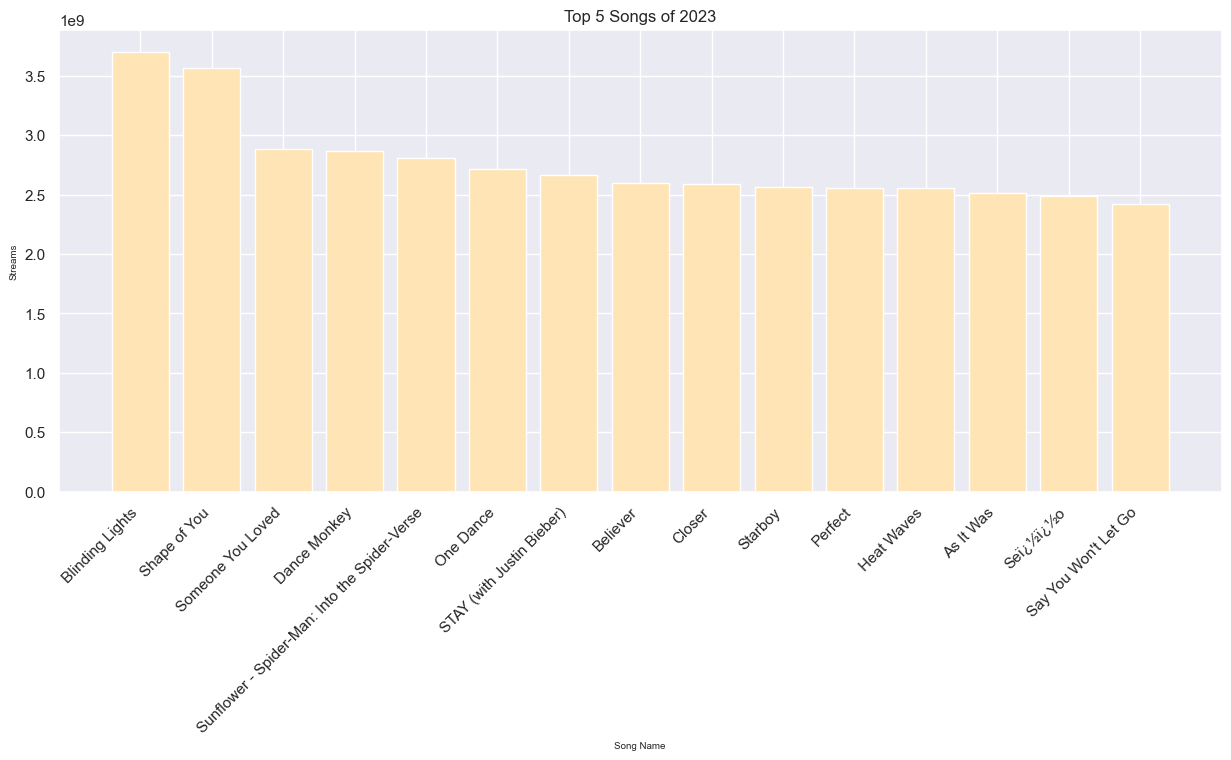

In [6]:
# Keep top 15 songs for visualization
topSong_df = df.sort_values('converted_streams', ascending=False).head(15)

# Visualize the top 15 songs
sns.set()
plt.figure(figsize=(15,6))

plt.bar(topSong_df.track_name, topSong_df.converted_streams, color='moccasin')
plt.title("Top 5 Songs of 2023", fontsize = 12)
plt.xlabel("Song Name", fontsize = 7)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Streams", fontsize = 7)
plt.show()

#### Who is the most streamed artist in 2023?
Since multiple artists can be on a track, we'll give each artist the number of streams for that track.
For example, Latto's and Jung Kook's song 'Seven' has 141,381,703 streams -- both artists will recieve 141,381,703 streams to their total volume of streams.

In [7]:
# Create a new dataframe with only artists and streams
artist_df = df[['artist(s)_name', 'converted_streams']].copy()

listArtistConversion = []

# Convert artist(s)_name to a list
for item in artist_df['artist(s)_name']:
    listArtistConversion.append(item.split(","))

# Add the column to our new dataframe
artist_df['artist'] = listArtistConversion

# Give each artist on a track, the number of streams for that track
artist_df = artist_df.explode('artist')

# Sum total streams per artist
artist_df_2 = artist_df.groupby('artist')['converted_streams'].sum().reset_index(name='totalStreams')

# Return the artists with the most streams
topArtist = artist_df_2.loc[artist_df_2['totalStreams'] == artist_df_2['totalStreams'].max(), ['artist', 'totalStreams']]

print("The most streamed artists of 2023 was " + topArtist['artist'] + ' with ' + str(topArtist['totalStreams']) + ' streams.')

751    The most streamed artists of 2023 was The Week...
Name: artist, dtype: object


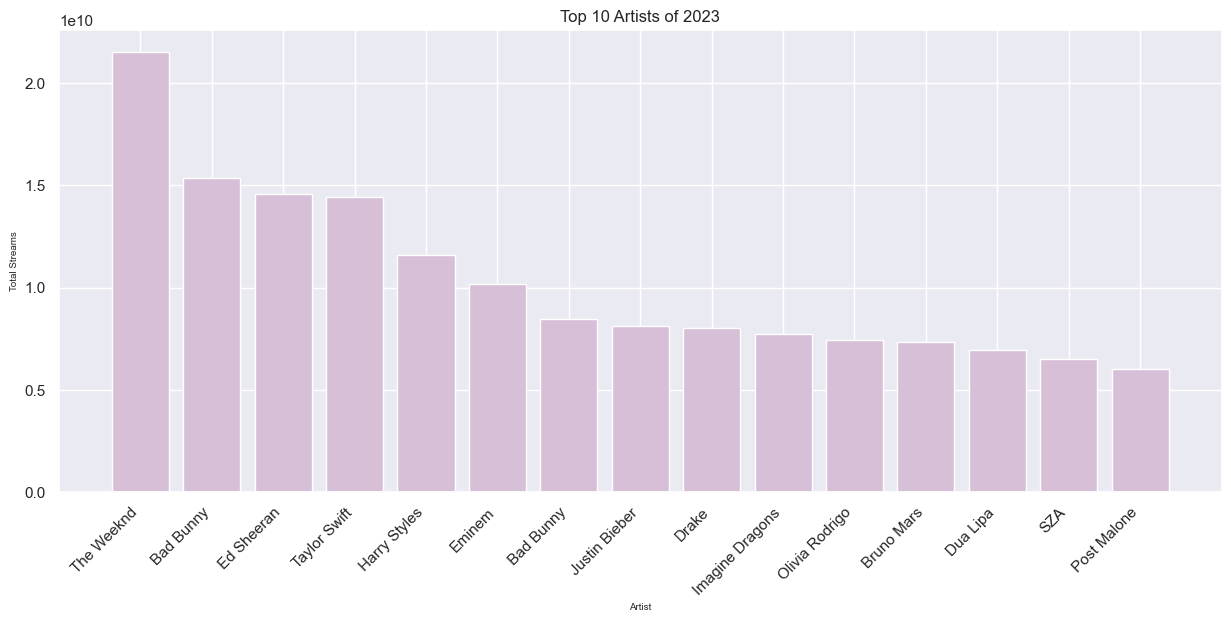

In [8]:
# Keep top 10 artists for visualization
artist_df_2 = artist_df_2.sort_values('totalStreams', ascending=False).head(15)

# Visualize the top 10 artists
sns.set()
plt.figure(figsize=(15,6))

plt.bar(artist_df_2.artist, artist_df_2.totalStreams, color='thistle')
plt.title("Top 10 Artists of 2023", fontsize = 12)
plt.xlabel("Artist", fontsize = 7)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Streams", fontsize = 7)
plt.show()

## Track Release Trends

#### What percentage of songs were released in 2023?

In [9]:
# Create a new dataframe that counts the number of tracks released per year
tracksPerYear = df.groupby('released_year', as_index=False)['key'].count()

# Numerator; Number of tracks released in 2023
tracks2023 = tracksPerYear.loc[tracksPerYear['released_year'] == 2023, 'key'].sum()

# Numerator; Number of tracks released before 2023
tracksBefore2023 = tracksPerYear.loc[tracksPerYear['released_year'] < 2023, 'key'].sum()

# Denominator; Number of tracks in the dataset
numTracks = tracks2023 + tracksBefore2023

# Percentage of 2023 track releases
print("Percent of tracks released in 2023: " + f"{tracks2023 / numTracks:.1%}")

# Percentage of pre-2023 track releases
print("Percent of tracks released before 2023: " + f"{tracksBefore2023 / numTracks:.1%}")


Percent of tracks released in 2023: 18.5%
Percent of tracks released before 2023: 81.5%


Of the 81.5% of tracks released prior to 2023, what was the breakdown?

In [10]:
# Remove 2023 released tracks
tracksPerYear = tracksPerYear[tracksPerYear['released_year'] != 2023]

# Group pre-2015 songs into 1 category
tracksPerYear['released_year_modified'] = np.where(tracksPerYear['released_year']< 2015, '< 2015', tracksPerYear['released_year'])

tracksPerYear = tracksPerYear.groupby(tracksPerYear['released_year_modified'], as_index = False)['key'].sum()
#print(tracksPerYear)

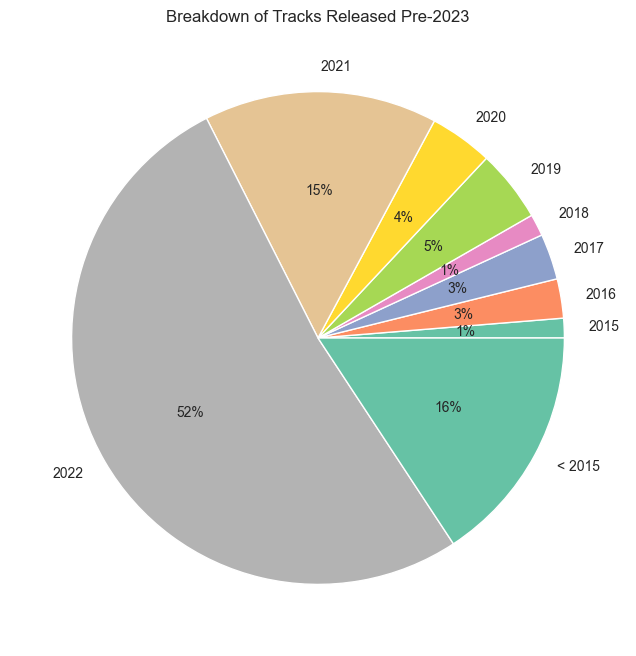

In [11]:
# Visualize breakdown of tracks released prior to 2023
sns.set()
plt.figure(figsize=(8,8))

plt.pie(tracksPerYear['key'], 
        labels = tracksPerYear['released_year_modified'], 
        # Show percentage, no decimals
        autopct='%1.0f%%',
        # Use Set2 color palette from library seaborn
        colors=sns.color_palette('Set2'),
        textprops={'fontsize':10})

plt.title("Breakdown of Tracks Released Pre-2023", fontsize = 12)

plt.show()

#### How did the vibes of tracks released trend over time?

In [51]:
# Combine year, month, and day to a string
# For daily aggregation (not shown)
df['released_date'] = df['released_year'].astype(str) + "-" + df['released_month'].astype(str) + '-' + df['released_day'].astype(str)

# Convert from a string to a date
df['released_date'] = pd.to_datetime(df['released_date'], format='%Y-%m-%d')

In [54]:
# Create a dataset for data from 2020 onwards
trackVibes_df = df.loc[df['released_year'] >= 2020]

# Combine year and month to a string
trackVibes_df['released_year_month'] = trackVibes_df['released_year'].astype(str) + '-' + trackVibes_df['released_month'].astype(str)

# Convert from a string to a date
trackVibes_df['released_year_month'] = pd.to_datetime(trackVibes_df['released_year_month'], format='%Y-%m')

# Calculate the daily average vibes for each category
trackVibes_df = trackVibes_df.groupby(trackVibes_df['released_year_month'], as_index=False)['danceability_%', 'valence_%', 'energy_%','acousticness_%', 
                                                                                        'instrumentalness_%', 'liveness_%', 'speechiness_%'].mean()

/var/folders/_q/h62rxcz15_l9ck78yt4l7nbm0000gn/T/ipykernel_8007/572792765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackVibes_df['released_year_month'] = trackVibes_df['released_year'].astype(str) + '-' + trackVibes_df['released_month'].astype(str)
/var/folders/_q/h62rxcz15_l9ck78yt4l7nbm0000gn/T/ipykernel_8007/572792765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackVibes_df['released_year_month'] = pd.to_datetime(trackVibes_df['released_year_month'], format='%Y-%m')
/var/folders/_q/h6

<Axes: title={'center': 'Trending Vibes of Tracks Released from 2020'}, xlabel='Date (Month)', ylabel='Average Percentage of Vibe'>

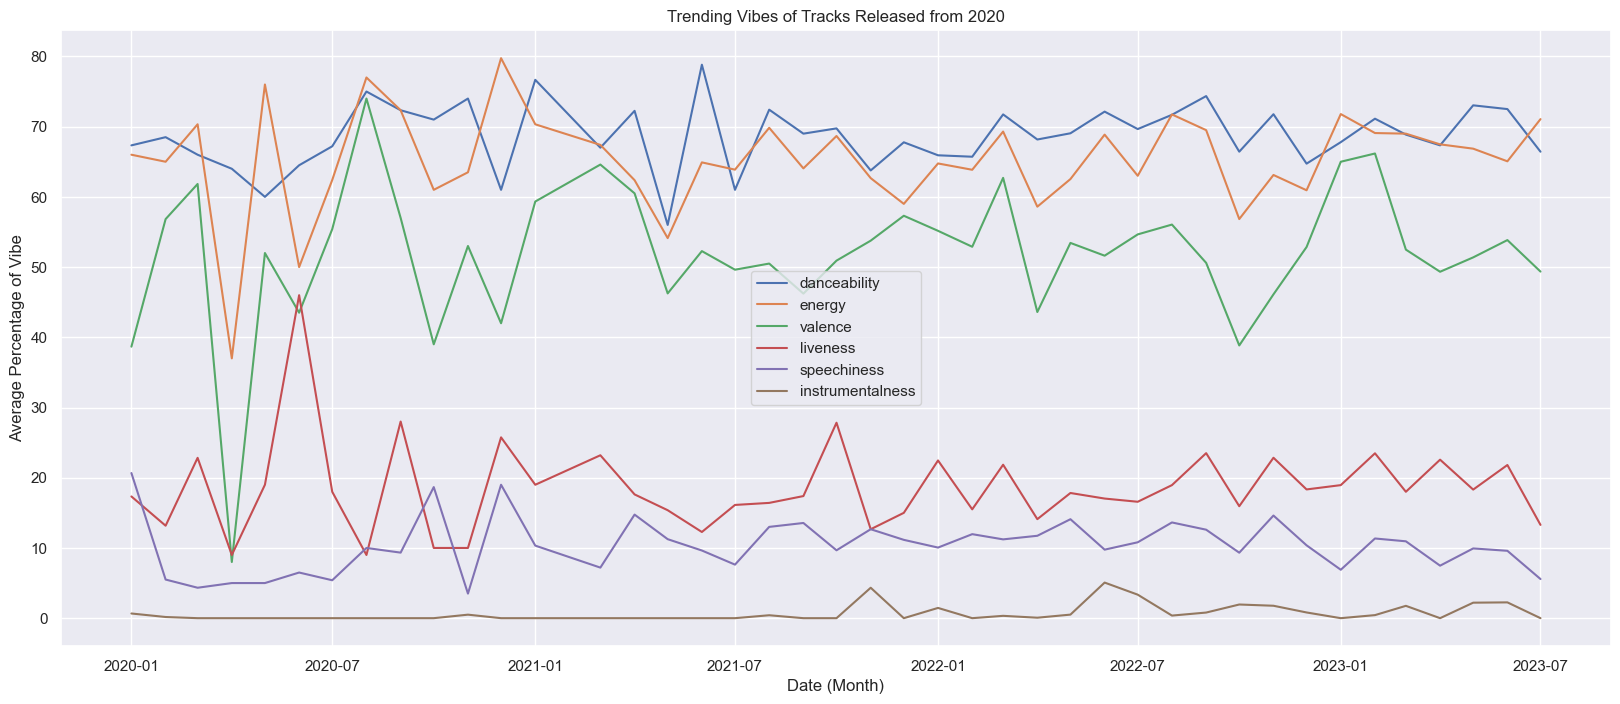

In [55]:
# Visualize
sns.set()
plt.figure(figsize=(20,8))

plt.title('Trending Vibes of Tracks Released from 2020')
plt.xlabel('Date (Month)')
plt.ylabel('Average Percentage of Vibe')

sns.lineplot(x=trackVibes_df.released_year_month, y=trackVibes_df['danceability_%'], label = 'danceability')
sns.lineplot(x=trackVibes_df.released_year_month, y=trackVibes_df['energy_%'], label = 'energy')
sns.lineplot(x=trackVibes_df.released_year_month, y=trackVibes_df['valence_%'], label = 'valence')
sns.lineplot(x=trackVibes_df.released_year_month, y=trackVibes_df['liveness_%'], label = 'liveness')
sns.lineplot(x=trackVibes_df.released_year_month, y=trackVibes_df['speechiness_%'], label = 'speechiness')
sns.lineplot(x=trackVibes_df.released_year_month, y=trackVibes_df['instrumentalness_%'], label = 'instrumentalness')


#### What's the vibes of the top 10 most streamed songs of 2023?

<Axes: title={'center': 'Trending Vibes of the Top 10 Songs of 2023'}, xlabel='Song Rank', ylabel='Percentage of Vibe'>

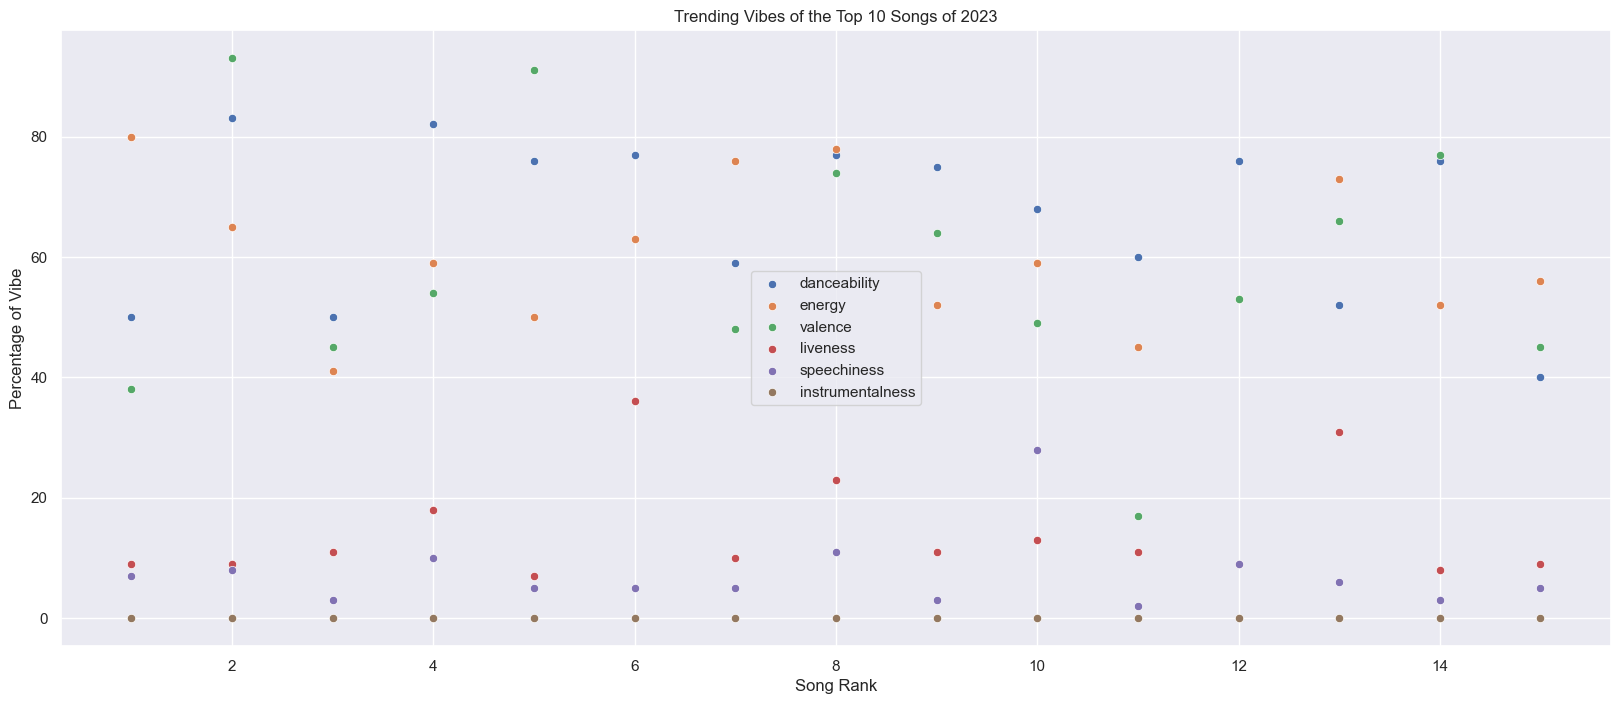

In [62]:
sns.set()
plt.figure(figsize=(20,8))

plt.title('Trending Vibes of the Top 10 Songs of 2023')
plt.xlabel('Song Rank')
plt.ylabel('Percentage of Vibe')

sns.scatterplot(x=topSong_df['stream_rank'], y=topSong_df['danceability_%'], label='danceability')
sns.scatterplot(x=topSong_df['stream_rank'], y=topSong_df['energy_%'], label = 'energy')
sns.scatterplot(x=topSong_df['stream_rank'], y=topSong_df['valence_%'], label = 'valence')
sns.scatterplot(x=topSong_df['stream_rank'], y=topSong_df['liveness_%'], label = 'liveness')
sns.scatterplot(x=topSong_df['stream_rank'], y=topSong_df['speechiness_%'], label = 'speechiness')
sns.scatterplot(x=topSong_df['stream_rank'], y=topSong_df['instrumentalness_%'], label = 'instrumentalness')

Text(0, 0.5, 'Percentage of Vibe')

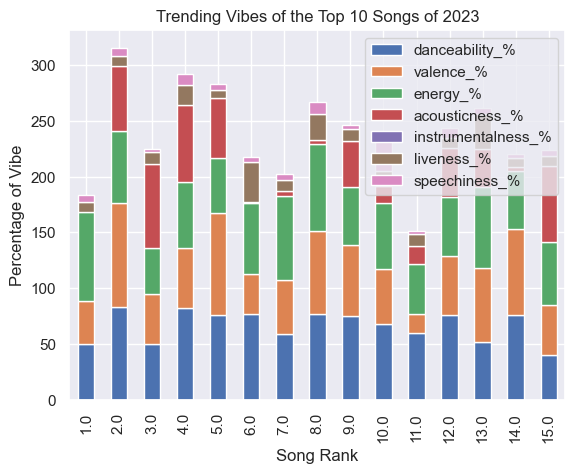

In [79]:
topSong_df_2 = topSong_df[['stream_rank','danceability_%', 'valence_%', 'energy_%','acousticness_%','instrumentalness_%', 
                           'liveness_%', 'speechiness_%' ]].copy()

topSong_df_2.set_index('stream_rank').plot(kind='bar', stacked=True)
sns.set()
plt.ticklabel_format(style='plain', useOffset=False, axis='y') 
plt.title('Trending Vibes of the Top 10 Songs of 2023')
plt.xlabel('Song Rank')
plt.ylabel('Percentage of Vibe')


#### What is the most popular month for a track release?

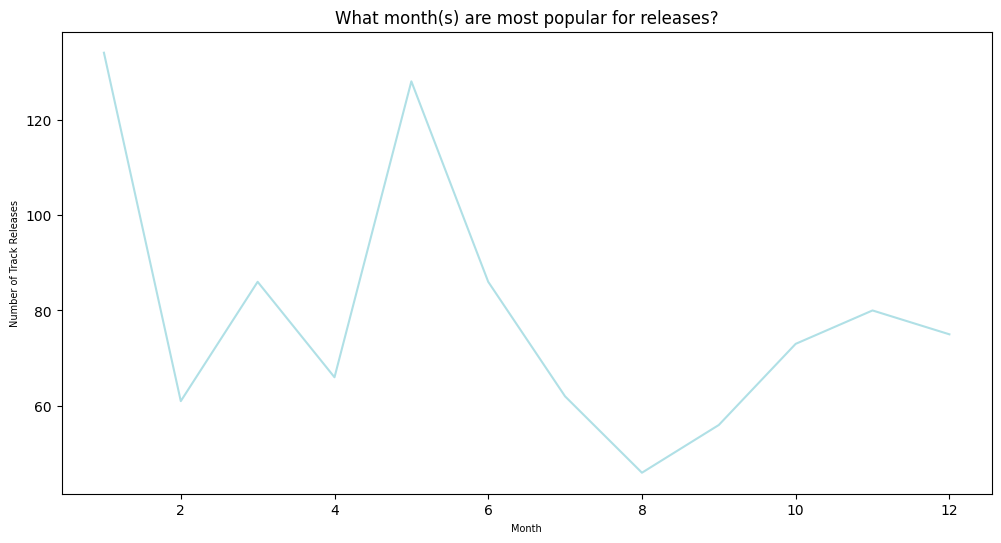

In [ ]:
# Count the number of tracks released every month (irrespective of year)
tracksPerMonth = df.groupby('released_month', as_index=False)['track_name'].count()

# Visualize the number of released tracks per month
plt.figure(figsize=(12,6))
plt.plot(tracksPerMonth.released_month, tracksPerMonth.track_name, color='powderblue')
plt.title("What month(s) are most popular for releases?", fontsize = 12)
plt.xlabel("Month", fontsize = 7)
plt.ylabel("Number of Track Releases", fontsize = 7)
plt.show()

#### What month was the most popular song of 2023 released?

In [ ]:
# Fetch the released year and month for the top song of 2023
print(df.loc[df['track_name'] == topSong['track_name'].values[0], ['released_year','released_month']])

    released_year  released_month
55           2019              11


#### What are the top genres per platform (apple, deezer, shazam)